<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/keystroke_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

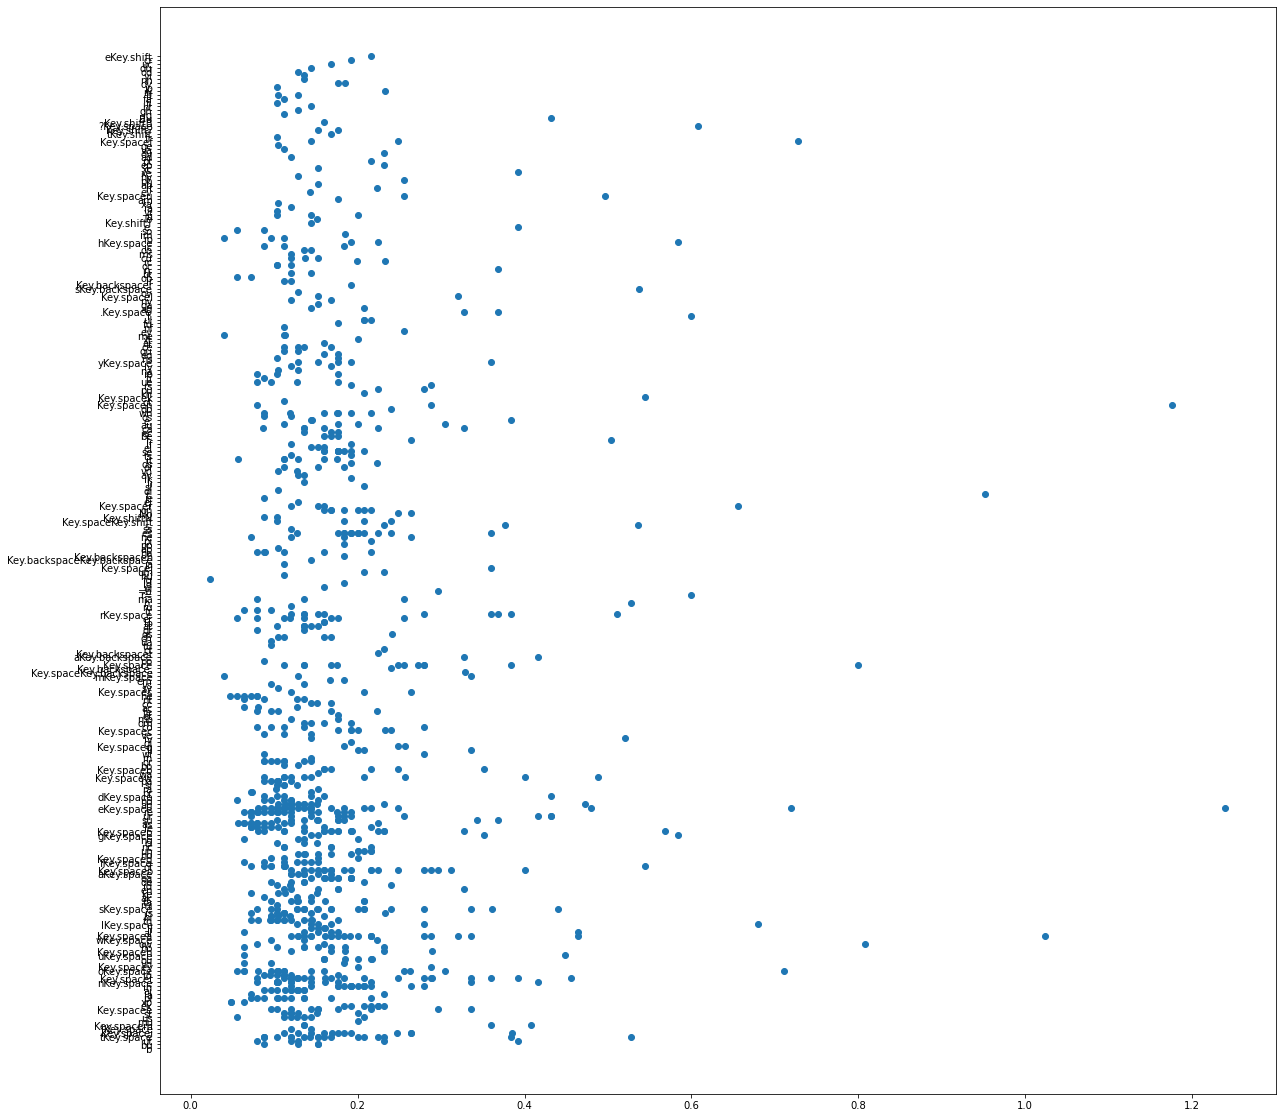

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/log.txt"
df = pd.read_csv(path,'\t', header = None)
df.columns = ['id','key','timestamp']
df["prev_timestamp"] = [np.nan] + df.iloc[:-1]["timestamp"].tolist()
df.timestamp = pd.to_datetime(df.timestamp)
df.prev_timestamp = pd.to_datetime(df.prev_timestamp)

df['delta'] = (df.timestamp - df.prev_timestamp)
df.delta = df.delta.astype(str)
df.delta = df.delta.str[-9:]
df.delta = pd.to_numeric(df.delta, errors='coerce')

df["combo_key"] = [" "] + df.iloc[:-1]["key"].tolist()
df["combo_key"] = df["combo_key"] + df["key"]
df['person'] = "Tomasz"
tomasz_full = df
# id  key timestamp prev_timestamp  delta combo_key
y = df.combo_key
x = df.delta
plt.scatter(x, y)

plt.show()

      combo_key     delta
0             b       NaN
1    ,Key.space  0.270527
2    .Key.space  0.348000
3            =b  0.295950
4    ?Key.space  0.607996
..          ...       ...
252          xt  0.200000
253  yKey.space  0.201580
254          yi  0.135743
255          yo  0.114429
256          ys  0.116166

[257 rows x 2 columns]


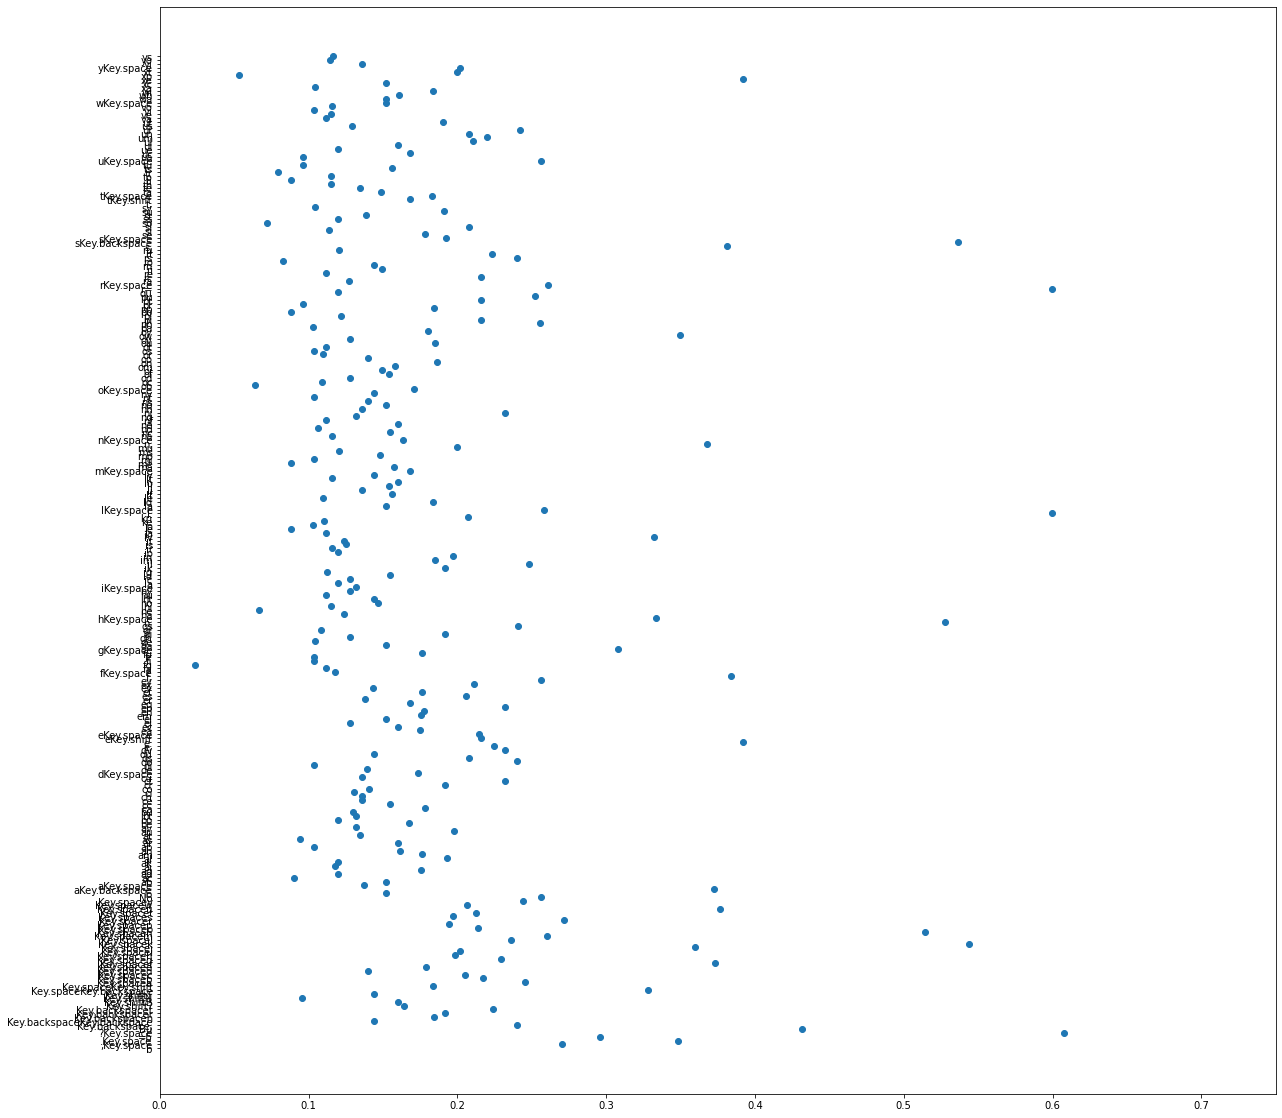

In [113]:
new = df[['combo_key', 'delta','person']].copy()
grouped_df = new.groupby("combo_key")

mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()

tomasz = mean_df
print(tomasz)

y = mean_df.combo_key
x = mean_df.delta
plt.scatter(x, y)
plt.xlim(0, 0.75)
plt.show()

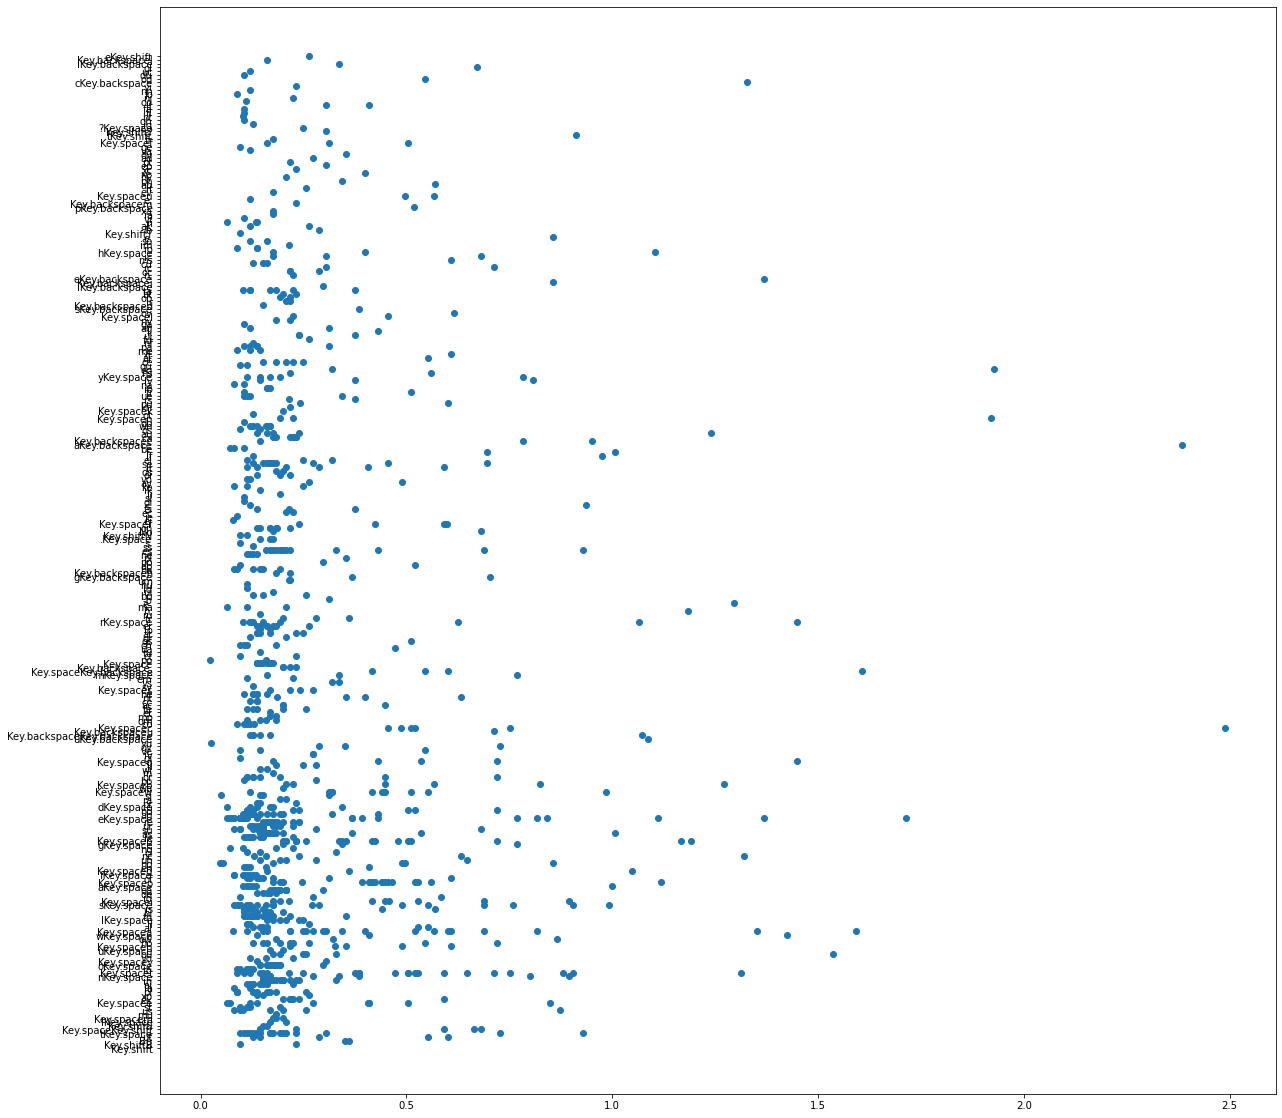

In [114]:
path = "/content/monika.txt"
df = pd.read_csv(path,'\t', header = None)
df.columns = ['id','key','timestamp']
df["prev_timestamp"] = [np.nan] + df.iloc[:-1]["timestamp"].tolist()
df.timestamp = pd.to_datetime(df.timestamp)
df.prev_timestamp = pd.to_datetime(df.prev_timestamp)

df['delta'] = (df.timestamp - df.prev_timestamp)
df.delta = df.delta.astype(str)
df.delta = df.delta.str[-9:]
df.delta = pd.to_numeric(df.delta, errors='coerce')

df["combo_key"] = [" "] + df.iloc[:-1]["key"].tolist()
df["combo_key"] = df["combo_key"] + df["key"]
df['person'] = "Monika"
monika_full = df
# id  key timestamp prev_timestamp  delta
y = df.combo_key
x = df.delta
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = 20,20
plt.show()

      combo_key     delta
0     Key.shift       NaN
1    ,Key.space  0.151407
2            -b  0.311999
3    .Key.space  0.162777
4    ?Key.space  0.247999
..          ...       ...
259  yKey.space  0.279921
260          yi  0.232264
261          yo  0.167912
262          ys  0.327894
263          yu  0.024320

[264 rows x 2 columns]


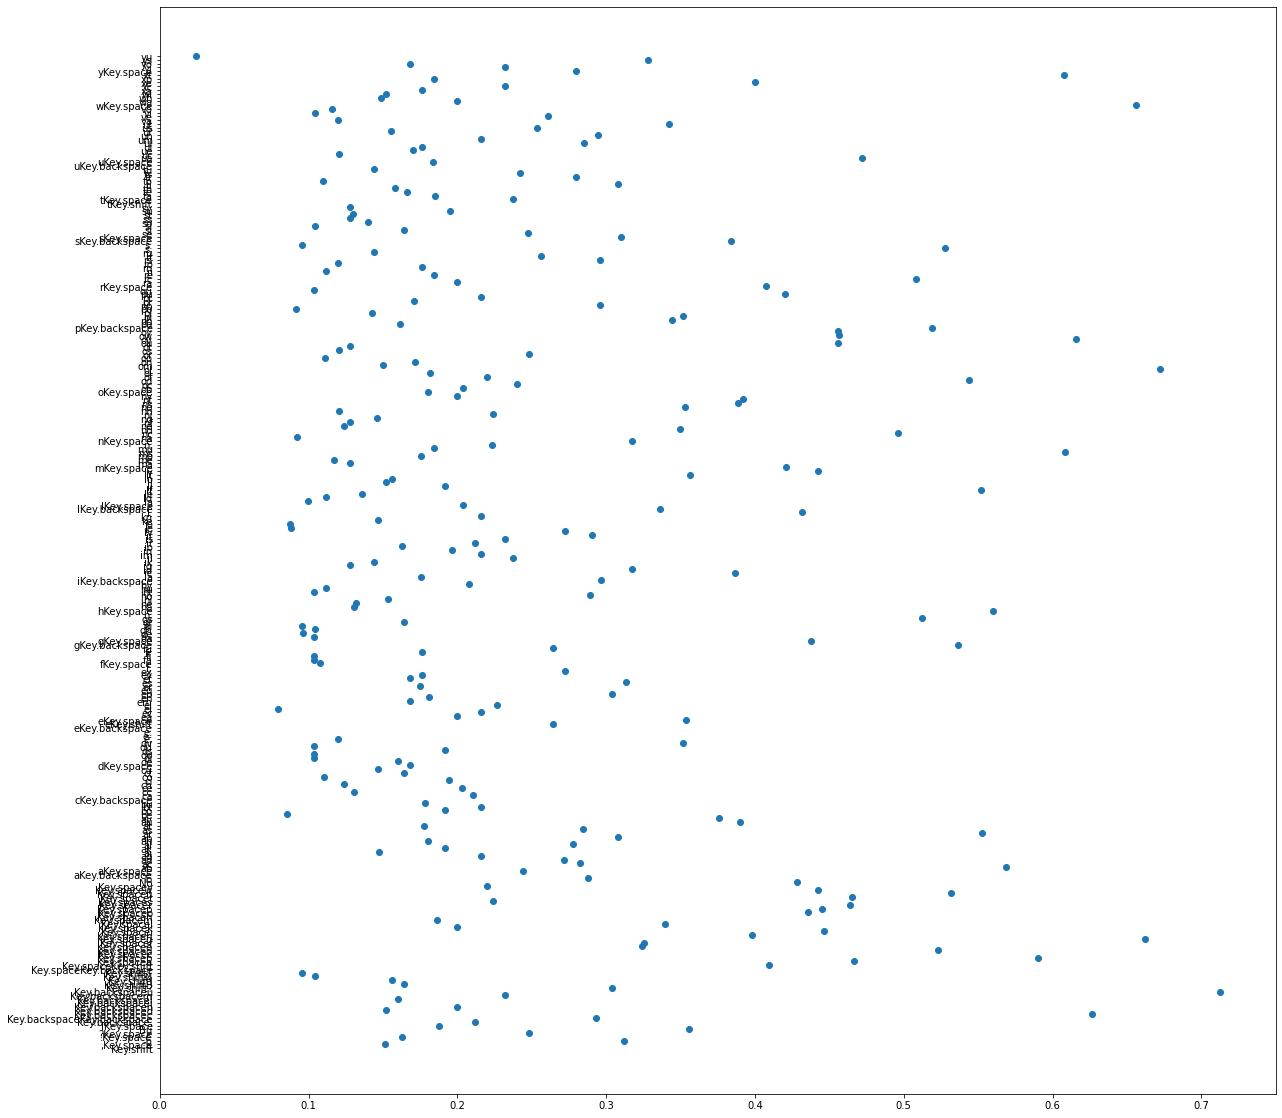

In [115]:
new = df[['combo_key', 'delta','person']].copy()
grouped_df = new.groupby("combo_key")

mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()

monika = mean_df
print(monika)

y = mean_df.combo_key
x = mean_df.delta
plt.scatter(x, y)
plt.xlim(0, 0.75)
plt.show()

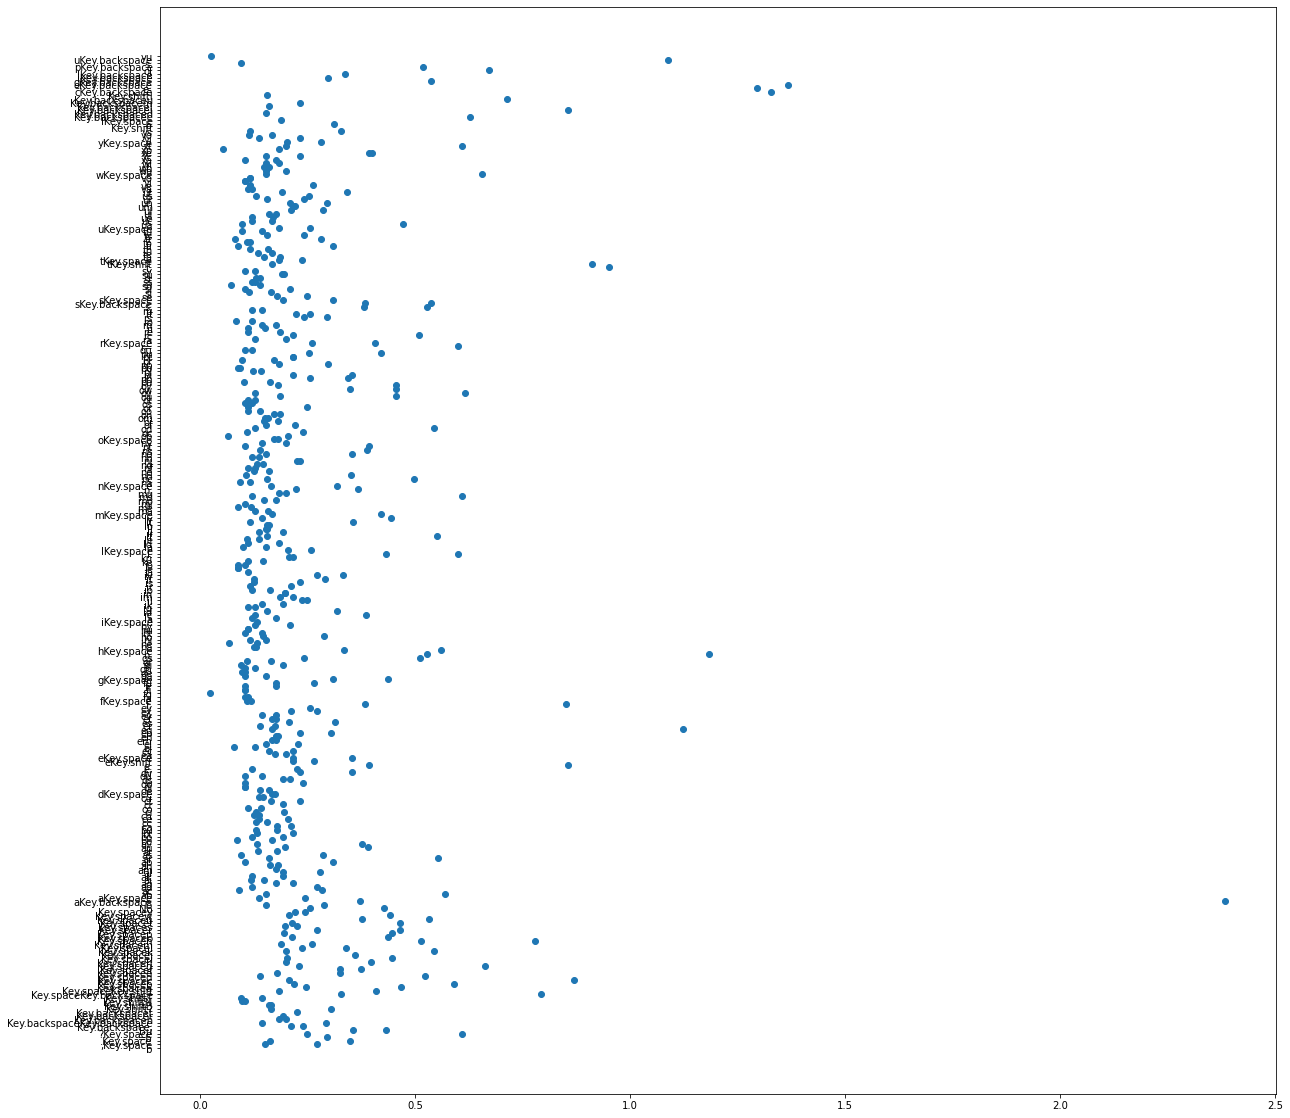

In [116]:
results = tomasz.append(monika, ignore_index=True)
results
x = results.delta
y = results.combo_key
plt.scatter(x, y)

In [117]:
results = results.sort_values(by=['combo_key'])
print(results.to_string())

                      combo_key     delta
257                   Key.shift       NaN
0                             b       NaN
1                    ,Key.space  0.270527
258                  ,Key.space  0.151407
259                          -b  0.311999
260                  .Key.space  0.162777
2                    .Key.space  0.348000
3                            =b  0.295950
261                  ?Key.space  0.247999
4                    ?Key.space  0.607996
5                            Bu  0.431550
262                          Bu  0.355823
263                  IKey.space  0.187999
264              Key.backspace,  0.212079
6                Key.backspace,  0.240006
7    Key.backspaceKey.backspace  0.143998
265  Key.backspaceKey.backspace  0.293253
266              Key.backspacec  0.626665
267              Key.backspaced  0.152000
8                Key.backspaceh  0.184020
268              Key.backspaceh  0.200026
269              Key.backspacei  0.855997
270              Key.backspacel  0

(392, 4)


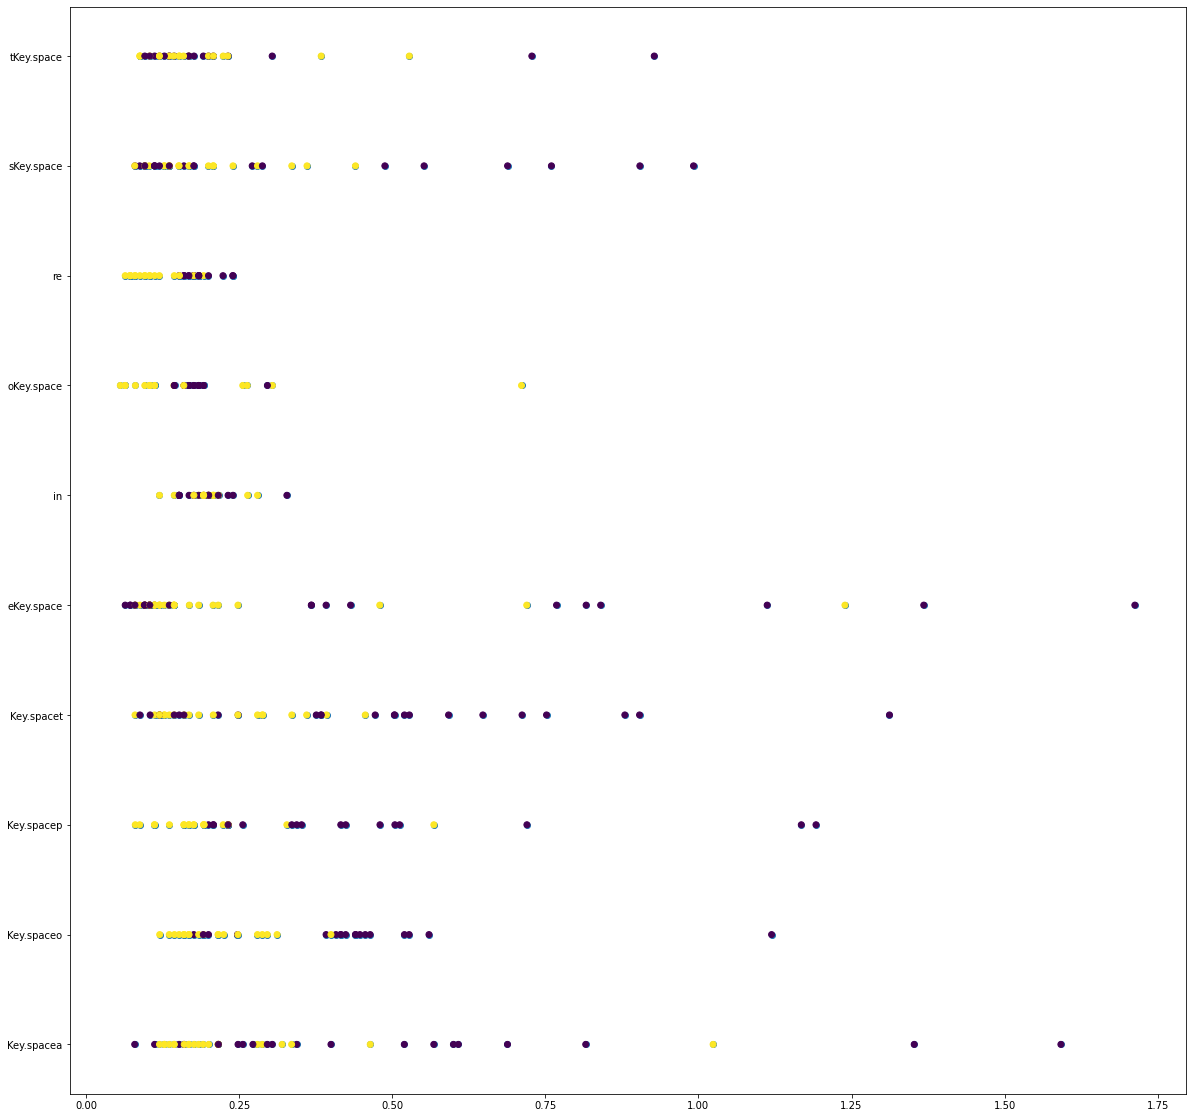

In [118]:
full = tomasz_full.append(monika_full, ignore_index=True)
full

fa = full[['combo_key','person','delta']].copy()
fa['occur'] = fa.groupby('combo_key')['person'].transform('size')

fa = fa.sort_values(by=['combo_key'])
fa2 = fa[fa.occur > 30]

print(fa2.shape)
x = fa2.delta
y = fa2.combo_key
plt.scatter(x, y)
plt.scatter(x, y, c=(fa2.person=='Tomasz'))

